In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold


In [ ]:
data = pd.read_excel("/content/heart_failure_clinical_records.xlsx")

In [ ]:
data.shape

(299, 13)

In [ ]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0.0,582.0,0.0,20.0,1.0,265000.00,1.9,130.0,1.0,0.0,4.0,1.0
1,55.0,0.0,7861.0,0.0,38.0,0.0,263358.03,1.1,136.0,1.0,0.0,6.0,1.0
2,65.0,0.0,146.0,0.0,20.0,0.0,162000.00,1.3,129.0,1.0,1.0,7.0,1.0
3,50.0,1.0,111.0,0.0,20.0,0.0,210000.00,1.9,137.0,1.0,0.0,7.0,1.0
4,65.0,1.0,160.0,1.0,20.0,0.0,327000.00,2.7,116.0,0.0,0.0,8.0,1.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    float64
 2   creatinine_phosphokinase  299 non-null    float64
 3   diabetes                  299 non-null    float64
 4   ejection_fraction         299 non-null    float64
 5   high_blood_pressure       299 non-null    float64
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    float64
 9   sex                       299 non-null    float64
 10  smoking                   299 non-null    float64
 11  time                      299 non-null    float64
 12  DEATH_EVENT               299 non-null    float64
dtypes: float64(13)
memory usage: 30.5 KB


In [ ]:
dataColumns = data.columns
dataColumns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [ ]:
data.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


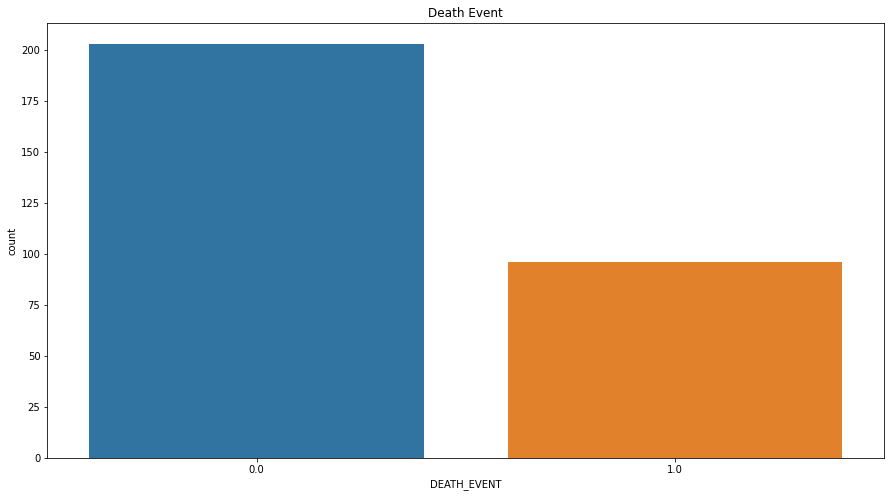

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data.DEATH_EVENT)
plt.title('Death Event')
plt.show()

In [ ]:
data.DEATH_EVENT.value_counts()

0.0    203
1.0     96
Name: DEATH_EVENT, dtype: int64

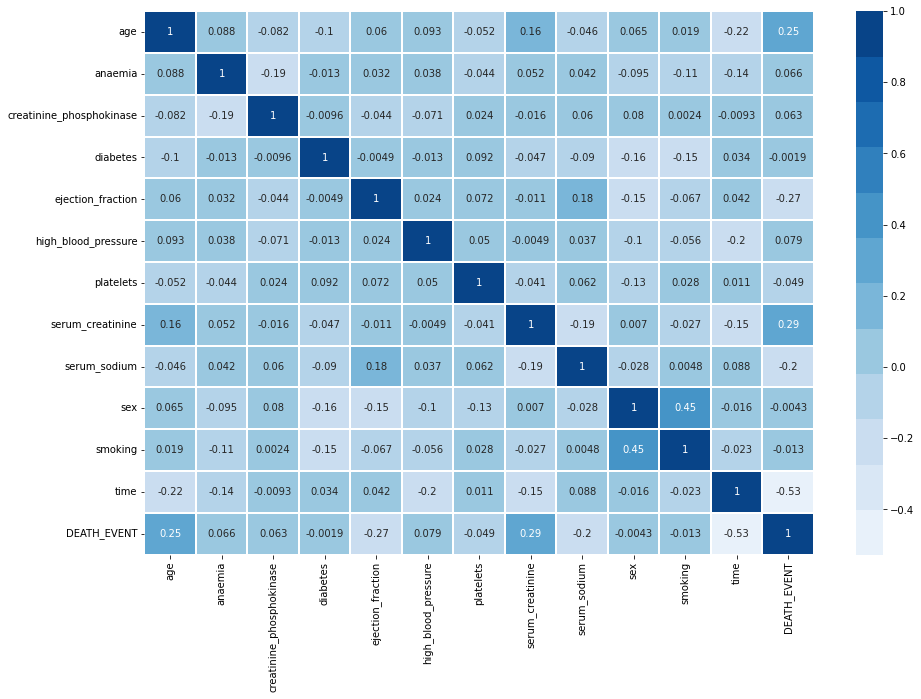

In [ ]:
colorMap = sns.color_palette("Blues",12)
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), linewidth = 1 , annot = True, cmap = colorMap)

Model Building: 
    

Below, we are separting our data into 2 parts Dependent Variable and Independent variable 

In [ ]:
x = data.drop("DEATH_EVENT", axis=1)
y = data.DEATH_EVENT

print("Shape of x is :", x.shape)
print("Shape of y is :", y.shape)

Shape of x is : (299, 12)
Shape of y is : (299,)


Now we are spiliting the data for Training and Testing.

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 42)

print("Shape of X Train: ",xTrain.shape)
print("Shape of Y Train: ",yTrain.shape)
print("Shape of X Test: ",xTest.shape)
print("Shape of Y Test: ",yTest.shape)

Shape of X Train:  (239, 12)
Shape of Y Train:  (239,)
Shape of X Test:  (60, 12)
Shape of Y Test:  (60,)


Standard Scaling:
    We are using Standard Scalar because in the data there is imblanced data.
    So that we can scale down the data points between -3 to 3.
    from this our model can learn better.

In [ ]:
scale = StandardScaler()

In [ ]:
xTrain = scale.fit_transform(xTrain)
xTest = scale.transform(xTest)

Logistic Regression: Because our targated variable is 0 or 1. 

In [ ]:
logreg = LogisticRegression()

In [ ]:
logreg.fit(xTrain, yTrain)
yPredicted = logreg.predict(xTest)

In [ ]:
LogisticRegressionScore = accuracy_score(yTest, yPredicted)
print(f"Accuracy Score of Logistic Regression Model= {round(LogisticRegressionScore*100,2)}%")


Accuracy Score of Logistic Regression Model= 80.0%


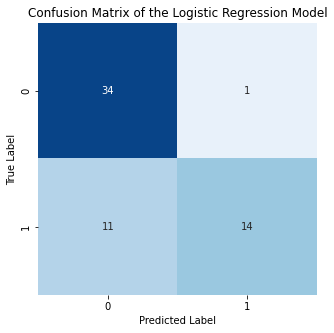

In [ ]:
confusionMatrix = confusion_matrix(yTest, yPredicted)

plt.figure(figsize=(5,5))
sns.heatmap(confusionMatrix, annot=True, cbar=None, cmap=colorMap)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of the Logistic Regression Model')
plt.show()

In [ ]:
print(classification_report(yTest, yPredicted))

              precision    recall  f1-score   support

         0.0       0.76      0.97      0.85        35
         1.0       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.78        60
weighted avg       0.83      0.80      0.79        60



Cross Validation using K Flod:
  We will use cross validation to get more accuracy for our model.

In [ ]:
crossValScore =cross_val_score(LogisticRegression(), xTrain, yTrain, cv = 5, scoring='accuracy')
crossValScore

array([0.85416667, 0.875     , 0.91666667, 0.77083333, 0.74468085])

In [ ]:
logisticResult = round(crossValScore.mean()*100,2)

In [ ]:
print(f"Accuracy Score after Cross validation is = {logisticResult}")

Accuracy Score after Cross validation is = 83.23


KNN Model :


In [ ]:
kclassifier = KNeighborsClassifier(n_neighbors=5, metric="euclidean", p=2)
kclassifier.fit(xTrain,yTrain)


KNeighborsClassifier(metric='euclidean')

In [ ]:
kPrediction = kclassifier.predict(xTest)  

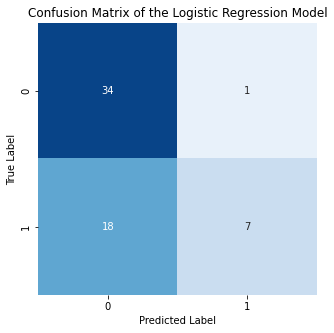

In [ ]:
conMat = confusion_matrix(yTest, kPrediction)
plt.figure(figsize=(5,5))
sns.heatmap(conMat, annot=True, cbar=None, cmap=colorMap)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix of the Logistic Regression Model')
plt.show()

In [ ]:
KnnAccuracyScore = accuracy_score(yTest, kPrediction)

print(f"Accuracy Score for Knn Model  = {round(KnnAccuracyScore*100, 2)}%")

Accuracy Score for Knn Model  = 68.33%


In [ ]:
crValScore =cross_val_score(KNeighborsClassifier(n_neighbors=5, metric="euclidean", p=2), xTrain, yTrain, cv = 5, scoring='accuracy')

KnnResult = round(crValScore.mean()*100,2)


In [ ]:
print(f"Accuracy Score after Cross validation is = {KnnResult}%")

Accuracy Score after Cross validation is = 76.55%


We can see that our Logistic Regression Model is working way better than KNN Classifier Model even before applying Cross Validation on logistic Regression.


In [ ]:
print(f"Logistic Regression Model Accuracy Score  = {logisticResult}%")
print(f"Knn Classifiction Accuracy Score = {KnnResult}%")

Logistic Regression Model Accuracy Score  = 83.23%
Knn Classifiction Accuracy Score = 76.55%
